> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

>_____________________________________________________________________________________________________________________

>
> I have chosen to examine a dataset containing the data on various movies, which have been released for the past few years. I would like to examine the set in order to answer the following questions: 

>    1) Which genres are most popular from year to year? 
>    2) What kinds of properties are associated with movies that have high revenues? 

>In order to examine the data to answer the first question, I am going to look at the genres, the revenues and the popularity index across a period of 5 years, which should provide me with a pattern of how the popularity of different genres changed across the set time period. 

> The second question I would like to examine is how the movies' revenue changes depending on the popularity index, the genre and the director, who directed the film. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

# I have loaded the data into a panadas dataframe and used the .head function to examine the headers and the first few lines to see which data is contained in the set.



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# Examining the data - in order to understand the overall size of the dataset I am going to examine it using the .shape function

df.shape

# which shows that there are 21 columns and 10886 rows in the dataset. 

In [ ]:
df.describe()

# In order to see the overall picture of the ranges of data presented (i.e. the start and end dates for the time period, range of popularity etc.)
# I am using the describe function in order to see the overall statistics for this dataset.

Based on the numners I can see that that there is a very wide gap between the popularity, which ranges between 0.000065 and 32. 32 is most likely an outlier, as the standard deviation is 1, and the mean is 0.65. Also if we look at the 75% quantile, the popularity index is 0.71. I would be interested in identifying the outlier(s) to see if there are any properties of those films, which make them significantly more popular than others. 

In [ ]:
df.info()

There are a number of columns containing the 'object' type of data, which means that it could be a mix of different data types or strings. I shall have a closer look at them to see if the data is in a single format

In [ ]:
df_objects = df.select_dtypes(include='object')

In [ ]:
df_objects.head()

From the objects table I can see that important data, such as cast, genres and production companies contain multiple values in a single cell. That will present a challenge if we were to run reports on the films where a specific actor was cast. I will need to find a way to split them into seperate columns to facilitate a more granular analysis. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning - Reformatting the dataframe 

In [ ]:
# Clean the data: Drop the columns you don't need by using df.drop(['column_name', 'column_name2'], axis = 1, inplace = True)

Based on my research questions, I am not going to need any of the description-related columns, other than the genre and the director. In order to streamline the process of data analysis and get rid of unnecessary data, I am going to exclude the following columns from the dataframe: imdb_id, homepage, tagline, keywords, overview, production companies, as the values in those companies will not be factored into the main analysis.

In [4]:
df.drop(['homepage', 'tagline', 'overview'], axis = 1, inplace = True)

After discussing the structure of the data and any problems that need to be
cleaned, perform those cleaning steps in the second part of this section.
In order to to see if there are any cells, which are empty, I am going to see a list of empty cells:

In [ ]:
df.columns.tolist()

In [ ]:
#df.columns.tolist()

df.isna().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [5]:
#In order to get rid of the zero values, I am going to drop the empty cells:

df.dropna(axis = 0, inplace=True)


In [ ]:
df.columns.tolist()

In [ ]:
#From what I can tell now, there are no zero values in any of the cells now.


In [6]:
#df.to_excel('test_file.xlsx')
#Checking how many cells contain 0 in the 'revenue'. This is important, as since one of the questions I am looking to answer 
# is which movies' qualities affect their revenue. Since there is no revenue, I cannot use those films  


df[df['revenue'] == 0].count()

id                      4128
imdb_id                 4128
popularity              4128
budget                  4128
revenue                 4128
original_title          4128
cast                    4128
director                4128
keywords                4128
runtime                 4128
genres                  4128
production_companies    4128
release_date            4128
vote_count              4128
vote_average            4128
release_year            4128
budget_adj              4128
revenue_adj             4128
dtype: int64

In [7]:
#Dropping the revenue rows, which contain zeros

no_revenue = df[df['revenue'] == 0].index




In [8]:
#Checking again to make sure all rows where revenue = 0 have been deleted 


df.drop(no_revenue, inplace=True)


In [9]:
df[df['revenue'] == 0].count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [ ]:
df.isnull().sum()


In [ ]:
df

In [ ]:
# Cleaning the data: 


In [ ]:
df.head()
# As we can see the columns with irrelevant data have been removed. 

In order to provide a more granular and in-depth analysis of the genres, I am going to add additional columns to the dataframe with titles 'Subgenre 1', 'Subgenre 2' etc. and split the strings in the "Genre" column, inserting the relevant pieces into each "subgenre" column. 

In [ ]:
df.columns.tolist()

In [ ]:
#df_genres = df['genres']
#df2 = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

In [10]:

genres_df = df['genres'].apply(pd.Series)
genres_df = genres_df.rename(columns = lambda x : 'genre_' + str(x))
#genres_df.genre_0=genres_df.genre_0.str.split('|').tolist()

In [11]:
genres_df.genre_0=genres_df.genre_0.str.split('|').tolist()

In [ ]:
#Checking the longest list in the dataframe to establish how many more columns we would need to create:



In [ ]:
genres_df

In [12]:
genres_df['genre_1'], genres_df['genre_2'], genres_df['genre_3'], genres_df['genre_4'], genres_df['genre_5'] = genres_df.iloc[:,0].str[0], genres_df.iloc[:,0].str[1], genres_df.iloc[:,0].str[2], genres_df.iloc[:,0].str[3], genres_df.iloc[:,0].str[4]

In [ ]:
genres_df


In [13]:
genres_df = genres_df.drop('genre_0', axis=1)

In [14]:
#Replacing NaN with zeros
genres_df.fillna(value=0, axis=1, inplace=True)

In [ ]:
genres_df

In [ ]:
#df = df.join(genres_df)

In [ ]:
df

In [15]:
#Performing a similar cleaning of the cast


cast_df = df['cast'].apply(pd.Series)
cast_df = cast_df.rename(columns = lambda x : 'cast_' + str(x))
cast_df.cast_0=cast_df.cast_0.str.split('|').tolist()

In [ ]:
#cast_df.cast_0=cast_df.cast_0.str.split('|').tolist()

cast_df.head()

In [16]:

cast_df['actor_1'], cast_df['actor_2'], cast_df['actor_3'], cast_df['actor_4'], cast_df['actor_5'] = cast_df.iloc[:,0].str[0], cast_df.iloc[:,0].str[1], cast_df.iloc[:,0].str[2], cast_df.iloc[:,0].str[3], cast_df.iloc[:,0].str[4]
#for rows in cast_df.iterrows():
    #print(cast_df.loc['cast_0'].str.split('|').value_counts())

In [ ]:
cast_df

In [17]:
cast_df = cast_df.drop('cast_0', axis = 1)

In [ ]:
cast_df.fillna(value=0, axis=1, inplace=True)

In [ ]:
df.head()

In [18]:
#Cleaning the key words


keywords_df = df['keywords'].apply(pd.Series)
keywords_df = keywords_df.rename(columns = lambda x : 'keywords_' + str(x))
keywords_df.keywords_0=keywords_df.keywords_0.str.split('|').tolist()


In [ ]:
keywords_df

In [19]:
keywords_df['keyword_1'], keywords_df['keyword_2'], keywords_df['keyword_3'], keywords_df['keyword_4'], keywords_df['keyword_5'] = keywords_df.iloc[:,0].str[0], keywords_df.iloc[:,0].str[1], keywords_df.iloc[:,0].str[2], keywords_df.iloc[:,0].str[3], keywords_df.iloc[:,0].str[4]

In [ ]:
keywords_df

In [20]:
keywords_df.fillna(value=0, axis=1, inplace=True)

In [21]:
keywords_df = keywords_df.drop('keywords_0', axis = 1)

In [22]:
df = df.join(keywords_df)

In [23]:
df = df.join(genres_df)

In [24]:
df = df.join(cast_df)

In [ ]:
df.columns.tolist()

In [25]:
df['release_year_int'] = pd.to_numeric(df['release_year'], errors = 'coerce')
df['revenue_int'] = pd.to_numeric(df['revenue'], errors = 'coerce')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Changes in genres' popularity across the periods of 5 years: 


In order to avoid dealing with NaN and incorrect and missing data, I have decided to set the masks for each individual genre, so that the analysis would only be limited to the data, which has been tagged correctly - in this case the movies, which have the correct genre allocation.

> Changes in popularity across the periods of 5 years: 






In [26]:
df_last_five = df[(df.release_year) >= 2010]

#df_years = df.groupby('release_year')

In [27]:
df_last_five.groupby('release_year')
df_last_five.sort_values('release_year', ascending = False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,...,genre_3,genre_4,genre_5,actor_1,actor_2,actor_3,actor_4,actor_5,release_year_int,revenue_int
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,...,Science Fiction,Thriller,0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,2015,1513528810
136,277685,tt3713166,1.191138,1000000,62882090,Unfriended,Shelley Hennig|Moses Jacob Storm|Renee Olstead...,Levan Gabriadze,computer|bullying|revenge|internet|violence,82,...,0,0,0,Shelley Hennig,Moses Jacob Storm,Renee Olstead,William Peltz,Jacob Wysocki,2015,62882090
138,280092,tt3195644,1.164724,10000000,104303851,Insidious: Chapter 3,Dermot Mulroney|Stefanie Scott|Lin Shaye|Leigh...,Leigh Whannell,sequel,97,...,Thriller,0,0,Dermot Mulroney,Stefanie Scott,Lin Shaye,Leigh Whannell,Angus Sampson,2015,104303851
139,193687,tt1598642,1.161812,0,118483,Z for Zachariah,Margot Robbie|Chiwetel Ejiofor|Chris Pine,Craig Zobel,love triangle|based on novel|jealousy|radiatio...,97,...,Thriller,0,0,Margot Robbie,Chiwetel Ejiofor,Chris Pine,NaN,NaN,2015,118483
141,328589,tt3722070,1.142518,6000000,41387687,The Lady in the Van,Maggie Smith|Alex Jennings|Frances de la Tour|...,Nicholas Hytner,based on novel|biography|based on true story,104,...,0,0,0,Maggie Smith,Alex Jennings,Frances de la Tour,Gwen Taylor,Dominic Cooper,2015,41387687
142,228066,tt1976009,1.138395,40000000,34227298,Victor Frankenstein,James McAvoy|Daniel Radcliffe|Jessica Brown Fi...,Paul McGuigan,london|frankenstein|human experiment|reanimate...,109,...,Thriller,0,0,James McAvoy,Daniel Radcliffe,Jessica Brown Findlay,Andrew Scott,Charles Dance,2015,34227298
144,291270,tt2401878,1.125239,8000000,3759286,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,sex|depression|existentialism,90,...,Drama,Romance,0,Jennifer Jason Leigh,David Thewlis,Tom Noonan,NaN,NaN,2015,3759286
146,241257,tt3319920,1.065888,0,17671101,Regression,Ethan Hawke|Emma Watson|Aaron Ashmore|Devon Bo...,Alejandro AmenÃ¡bar,investigation|memory loss,106,...,Thriller,0,0,Ethan Hawke,Emma Watson,Aaron Ashmore,Devon Bostick,David Thewlis,2015,17671101
148,353326,tt0787524,1.046518,0,11472454,The Man Who Knew Infinity,Jeremy Irons|Dev Patel|Toby Jones|Stephen Fry|...,Matt Brown,england|indian|mathematician|biography|cambridge,108,...,0,0,0,Jeremy Irons,Dev Patel,Toby Jones,Stephen Fry,Jeremy Northam,2015,11472454
150,250124,tt3172532,1.038390,2000000,1477002,The Diary of a Teenage Girl,Bel Powley|Kristen Wiig|Alexander SkarsgÃ¥rd|C...,Marielle Heller,1970s|teenage girl|older man younger woman rel...,102,...,0,0,0,Bel Powley,Kristen Wiig,Alexander SkarsgÃ¥rd,Christopher Meloni,Margarita Levieva,2015,1477002


In [28]:
df_last_five.columns.tolist()

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'keywords',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'keyword_1',
 'keyword_2',
 'keyword_3',
 'keyword_4',
 'keyword_5',
 'genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'genre_5',
 'actor_1',
 'actor_2',
 'actor_3',
 'actor_4',
 'actor_5',
 'release_year_int',
 'revenue_int']

In [42]:
df_action = df_last_five.iloc[22].str.contains('Action')

In [43]:
df_action

id                        NaN
imdb_id                 False
popularity                NaN
budget                    NaN
revenue                   NaN
original_title          False
cast                    False
director                False
keywords                False
runtime                   NaN
genres                   True
production_companies    False
release_date            False
vote_count                NaN
vote_average              NaN
release_year              NaN
budget_adj                NaN
revenue_adj               NaN
keyword_1               False
keyword_2               False
keyword_3               False
keyword_4               False
keyword_5               False
genre_1                  True
genre_2                 False
genre_3                 False
genre_4                   NaN
genre_5                   NaN
actor_1                 False
actor_2                 False
actor_3                 False
actor_4                 False
actor_5                 False
release_ye

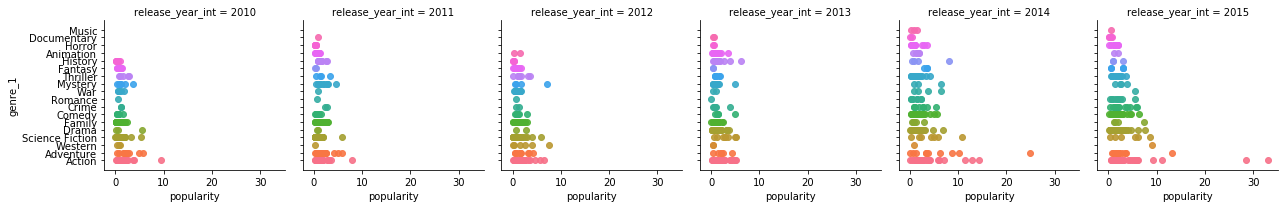

In [38]:
g = sns.FacetGrid(df_last_five, col="release_year_int", hue="genre_1")
g.map(plt.scatter, "popularity", "genre_1", alpha=.9)

In [ ]:
df_pop_rate = df_last_five.filter(['release_year_int', 'popularity', 'vote_count', 'vote_average', 'original_title'], axis = 1)

In [ ]:
#df_pop_rate
#plt.scatter(df_pop_rate.release_year_int, df_pop_rate.popularity)
plt.scatter(df_pop_rate.release_year_int, df_pop_rate.vote_average)

In [ ]:
sns.scatterplot(df_pop_rate.release_year_int, df_pop_rate.vote_average )

In [ ]:
sns.scatterplot(df_pop_rate.release_year_int, df_pop_rate.popularity)

In [ ]:
#Identifying outliers

df_pop_rate.loc[df_pop_rate['popularity'] > 20]




In [ ]:
#Exploring the relationship between the vote counts and popularity


sns.scatterplot(df_pop_rate.vote_count, df_pop_rate.popularity)

In [ ]:

df_pop_rate.loc[df_pop_rate['vote_count'] > 8000]

In [ ]:
sns.scatterplot(df_pop_rate.vote_count, df_pop_rate.vote_average)



#df[df.revenue].hist(figsize = (10,8));

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [ ]:
# Creating masks for cross-referencing - survived = df.Survived == True 
# died = df.Survived == False 
# df.Fare[survived].mean() - shows the mean Fare of everyone who survived /  compare with "died" group


In [ ]:
# Building the charts to compare the avg. fare vs. the survival rate
#  df.Fare[survived].hist(alpha = 0.5, bins = 20, label = 'survived')
#  df.Fare[died].hist(alpha = 0.5, label = 'died', bins = 20)

In [ ]:
#df.groupby('revenue').plot(kind='bar');

In [ ]:
# df.Sex.value_counts()

In [ ]:
# df.groupby.('Sex').['Pclass'].value_counts()

In [ ]:
# df.query('Sex == "Female" ')['Fare'].median(), df.query('Sex = "Male" ')['Fare'].median();
# df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind = 'bar');

In [ ]:
# df.SibSp[survived].value_counts().plot(kind = 'bar', alpha = 0.5, color = 'blue', label = 'survived')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!